## Predictive modelling 
### Week 1: Model training and evaluation

In [1]:
# libraries
import pandas as pd # process dataframe
import numpy as np # scientific calculation
import seaborn as sns # visualization complete stastistics
import matplotlib.pyplot as plt # visualization

import statsmodels.api as sm # statsmodels to build regression model

-s

### 0. Load training dataset: Used Cars Price Prediction from Kaggle
https://www.kaggle.com/datasets/avikasliwal/used-cars-price-prediction

In [2]:
train = pd.read_csv('../cars_dataset/train-data.csv')
train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


### 1. Processing predictor and target variable
We will choose to work with two variables, Price as a target variable and Engine as a predictor. 

In [3]:
train_0 = train[['Engine', 'Price']]
train_0 = train_0.copy()

# Engine is a string, so we will take 'CC' out and convert to number
train_0['Engine'] = train_0['Engine'].str.replace('CC','').astype(float)

# check description statistics
display(train_0.describe())

# find missing values
display(train_0.isnull().sum())

# display top 5 rows
display(train_0.head())

,Engine,Price
count,5983.000000,6019.000000
mean,1621.276450,9.479468
std,601.355233,11.187917
min,72.000000,0.440000
25%,1198.000000,3.500000
50%,1493.000000,5.640000
75%,1984.000000,9.950000
max,5998.000000,160.000000


Engine    36
Price      0
dtype: int64

,Engine,Price
0,998.0,1.75
1,1582.0,12.50
2,1199.0,4.50
3,1248.0,6.00
4,1968.0,17.74


Visualizing the relationship between these two variables using scatterplot. (This seaborn plot doesn't include missing data)

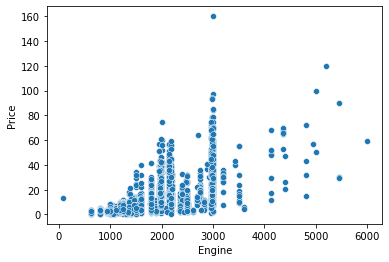

In [4]:
sns.scatterplot(x='Engine', y='Price', data=train_0);

### 2. Build an algorithm to predict selling price using engine size
We will build our very first algorithm to predict the price using linear regression. 

#### 2.1 Algorithm development

In [5]:
# excluding missing data
train_0_nomissing = train_0.dropna()

x = train_0_nomissing['Engine']
X = sm.add_constant(x)
y = train_0_nomissing['Price']

lr_reg = sm.OLS(y, X).fit()
lr_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     4575.
Date:                Fri, 01 Apr 2022   Prob (F-statistic):               0.00
Time:                        11:00:20   Log-Likelihood:                -21244.
No. Observations:                5983   AIC:                         4.249e+04
Df Residuals:                    5981   BIC:                         4.251e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.3840      0.313    -33.126      0.000     -10.998      -9.769
Engine         0.0123      0.000     67.642      0.000       0.012       0.013
==============================================================================
Omnibus:                     3822.025   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           106485.473
Skew:                           2.605   Prob(JB):                         0.00
Kurtosis:                      23.000   Cond. No.                     4.97e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the data and model fitting, we could predict sales price using Engine size with the below algorithm

Price = -10.3840 + 0.0123 x Engine

Coefficient: 0.0123
Intercept: -10.384


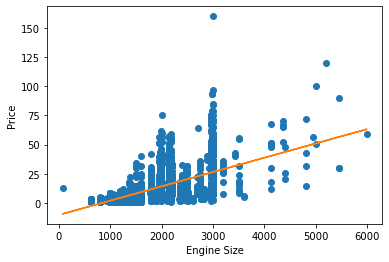

In [6]:
# create basic scatterplot
plt.plot(x, y, 'o')

# obtain m (slope) and b(intercept) of linear regression line
m, b = lr_reg.params[1], lr_reg.params[0]
print('Coefficient:', np.round(m, 4))
print('Intercept:', np.round(b, 4))

#add linear regression line to scatterplot 
plt.plot(x, m*x+b)
plt.xlabel('Engine Size')
plt.ylabel('Price');

#### 2.2 Algorithm deployment
Let's predict the selling price for 1500 cc, 2000 cc, 3000 cc, and 2400 cc cars

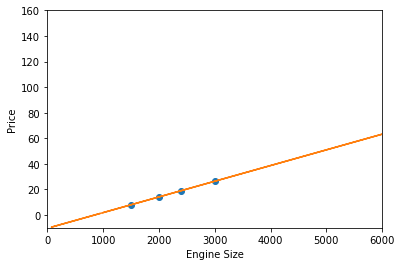

In [7]:
x_pred = np.array([1500, 2000, 2400, 3000])
X_pred = sm.add_constant(x_pred)
y_pred = lr_reg.predict(X_pred)

#create basic scatterplot
plt.plot(x_pred, y_pred, 'o')

# obtain m (slope) and b(intercept) of linear regression line
m, b = lr_reg.params[1], lr_reg.params[0]

#add linear regression line to scatterplot 
plt.plot(x, m*x+b)
plt.xlim(0,6000)
plt.ylim(-10, 160)
plt.xlabel('Engine Size')
plt.ylabel('Price');

### 3. How to verify the model accuracy?
How do we know if the price prediction algorithm works well in a reality? We need to validate it. <br><br>
To perform validation, we need to split data into two sets. The first one is the training set used for developing an algorithm. The other one is the test data which helps us to see how the model performs on the unseen observations. By comparing the prediction error between two sets, we could evaluate the model accuracy.

In [8]:
from sklearn.model_selection import train_test_split 

# perform train test split 
X_all = train_0_nomissing['Engine']
y_all = train_0_nomissing['Price']

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
                                                    test_size=0.3, 
                                                    random_state=42)

# check data size 
print('Training set size: ', len(X_train)) # 70% of total data
print('Test set size: ', len(X_test)) # 30% of total data

Training set size:  4188
Test set size:  1795


Let's see how the training set looks like once again

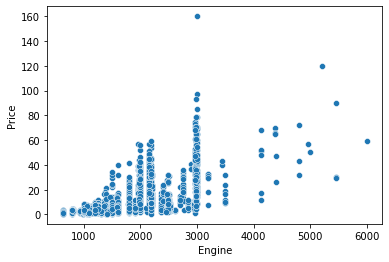

In [9]:
sns.scatterplot(x=X_train, y=y_train);

Train model on the training set, the parameters were changed a bit. 

In [10]:
# train the model again 
x = X_train
X = sm.add_constant(x)
y = y_train

lr_reg_1 = sm.OLS(y, X).fit()
lr_reg_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     3296.
Date:                Fri, 01 Apr 2022   Prob (F-statistic):               0.00
Time:                        11:00:24   Log-Likelihood:                -14892.
No. Observations:                4188   AIC:                         2.979e+04
Df Residuals:                    4186   BIC:                         2.980e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6066      0.374    -28.326      0.000     -11.341      -9.872
Engine         0.0125      0.000     57.415      0.000       0.012       0.013
==============================================================================
Omnibus:                     2850.490   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            99402.314
Skew:                           2.768   Prob(JB):                         0.00
Kurtosis:                      26.216   Cond. No.                     4.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The model can be evaluated using prediction error, it is a comparison between actual and prediction values. 

In [11]:
# functions to measure errors 

def get_raw_error(act, pred):
    return act - pred

def get_squared_error(act, pred):
    return np.square(act-pred)

def get_root_mean_squared_error(act, pred):
    return np.sqrt(np.mean(np.square(act-pred)))

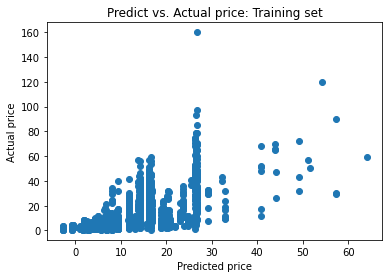

In [12]:
# predicting prices using to compare between prediction and actual values for the training set
trn_actual = y_train
X = sm.add_constant(x)
trn_pred = lr_reg_1.predict(X)

# plot actual vs. prediction
plt.plot(trn_pred, trn_actual, 'o')
plt.title('Predict vs. Actual price: Training set')
plt.xlabel('Predicted price')
plt.ylabel('Actual price');

2657    -0.271349
1034    -3.244446
2250     3.400151
302      0.274837
3864    -0.291033
          ...    
3796    -7.424242
5226    -7.536470
5261     1.864837
5426    -1.621349
864     16.263530
Length: 4188, dtype: float64

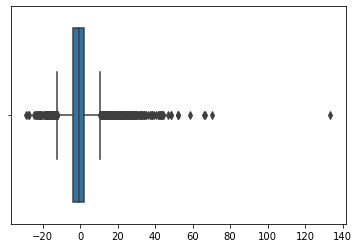

In [13]:
# plot raw error
display(get_raw_error(trn_actual, trn_pred))
sns.boxplot(x=get_raw_error(trn_actual, trn_pred));

2657      0.073630
1034     10.526432
2250     11.561029
302       0.075535
3864      0.084700
           ...    
3796     55.119367
5226     56.798387
5261      3.477616
5426      2.628772
864     264.502393
Length: 4188, dtype: float64

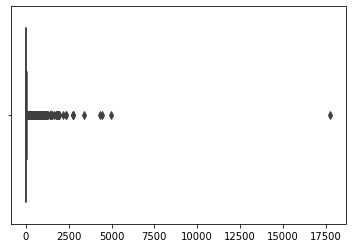

In [14]:
# plot squred error
display(get_squared_error(trn_actual, trn_pred))
sns.boxplot(x=get_squared_error(trn_actual, trn_pred));

Eventually, use root mean squared error to measure the prediction error on average.

In [15]:
# get root mean squared error (RMSE)
trn_rmse = get_root_mean_squared_error(trn_actual, trn_pred)
print(trn_rmse)

8.473036139467805


#### Quick exercise: predictions and error on the test set
1. Get predictions using model lr_reg_1 based on the test data
2. Plot a scatter plot, x axis represents predicted prices and y axis represents actual price
3. Calculate root mean squared error by using function get_root_mean_squared_error()

In [16]:
# 1. get prediction 
## obtain actual y_test
tst_actual = y_test

## obtain predict y_test
X = X_test
X = sm.add_constant(X)

# working on the below lines of code to get predictions


In [17]:
# 2. plot a scatterplot - you may copy the code from the earlier cell





In [18]:
# 3. calculate root mean squared error
# working on the below lines of code to get root mean squared error
# tst_rmse =
# print(tst_rmse)

If you did the exerise correctly, you would see that the training and test errors are pretty much the same. But why don't we try to minimize the error a little more by adjusting training data or add some terms to the model. 

### 4. Optimizing the model performance


#### 4.1 Experiment 1 filtering training data. 
To our knowledge, we've never seen cars that have engine capacity less than 1000 cc or not more than 2600 cc. So why don't we exclude these observations from the training set. Perhaps the model would perform better.


In [19]:
# filter data
train_filt1 = pd.DataFrame({'Engine': X_train,
                            'Price': y_train})

train_filt1 = train_filt1[(train_filt1['Engine']>1000)&(train_filt1['Engine']<=2600)]
X_train_f1, y_train_f1 = train_filt1['Engine'], train_filt1['Price']

print('New training size after excluded extreme Engine size: ', len(X_train_f1))

New training size after excluded extreme Engine size:  3437


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     1402.
Date:                Thu, 31 Mar 2022   Prob (F-statistic):          1.11e-257
Time:                        17:39:49   Log-Likelihood:                -11442.
No. Observations:                3437   AIC:                         2.289e+04
Df Residuals:                    3435   BIC:                         2.290e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.8913      0.475    -18.702      0.000      -9.823      -7.959
Engine         0.0110      0.000     37.448      0.000       0.010       0.012
==============================================================================
Omnibus:                     1474.919   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9355.194
Skew:                           1.934   Prob(JB):                         0.00
Kurtosis:                      10.097   Cond. No.                     6.67e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Coefficient: 0.011
Intercept: -8.8913


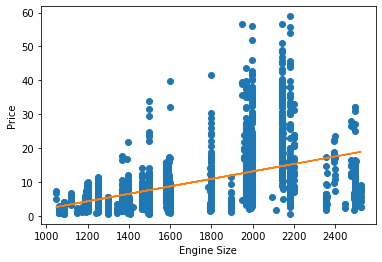

In [29]:
# train the model again 
x = X_train_f1
X = sm.add_constant(x)
y = y_train_f1

lr_reg_2 = sm.OLS(y, X).fit()
display(lr_reg_2.summary())

# create basic scatterplot
plt.plot(x, y, 'o')

# obtain m (slope) and b(intercept) of linear regression line
m, b = lr_reg_2.params[1], lr_reg_2.params[0]
print('Coefficient:', np.round(m, 4))
print('Intercept:', np.round(b, 4))

#add linear regression line to scatterplot 
plt.plot(x, m*x+b)
plt.xlabel('Engine Size')
plt.ylabel('Price');

In [30]:
y.mean()

8.380561536223478

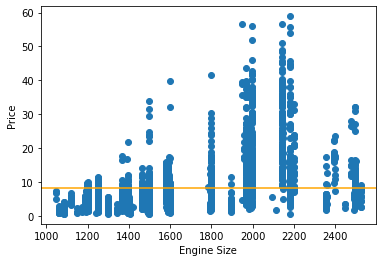

In [33]:
#add linear regression line to scatterplot 
plt.plot(x, y, 'o')
plt.axhline(y=y.mean(), color='orange')
plt.xlabel('Engine Size')
plt.ylabel('Price');

The training error decreased from 8.xx to 6.xx, are we doing better than the first try?

6.754763686121617


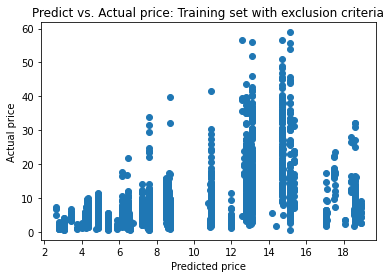

In [21]:
# evaluate the error
# predicting prices using to compare between prediction and actual values for the training set
trn_actual = y_train_f1
X = sm.add_constant(x)
trn_pred = lr_reg_2.predict(X)

# plot actual vs. prediction
plt.plot(trn_pred, trn_actual, 'o')
plt.title('Predict vs. Actual price: Training set with exclusion criteria')
plt.xlabel('Predicted price')
plt.ylabel('Actual price');

# get RMSE
print(get_root_mean_squared_error(trn_actual, trn_pred))

#### 4.2 Performance on the test set
A good model is a model that can generalize from development to the actual deployment. Hence, we expect the error to be the same. 

Let's see the test error. It didn't go down as expected, which indicates overfitting due to selection bias.

In [22]:
# 1. get prediction 
## obtain actual y_test
tst_actual = y_test

## obtain predict y_test
x = X_test
X = sm.add_constant(x)
tst_pred = lr_reg_2.predict(X)

# 2. get RMSE
print(get_root_mean_squared_error(tst_actual, tst_pred))

8.338123407963213
